In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from datetime import datetime
%matplotlib inline

In [2]:
# ËøûÊé•Êï∞ÊçÆÂ∫ìÂπ∂ËØªÂèñÊï∞ÊçÆ
connection = pymysql.connect(host='localhost', user='kilo', passwd='839211046', db='practice_database')
sql = """select * from movie_comments order by rating_time"""
data = pd.read_sql(sql, connection)

In [3]:
# ‰ª•rating_time‰∏∫Êó∂Èó¥Â∫èÂàóÔºåÂàÜÂà´ÊèêÂèñ‰∏§ÈÉ®ÁîµÂΩ±ÁöÑÊï∞ÊçÆ
time = data.set_index('rating_time')
time_sample1 = time[time['movie_name'] == 'Â§ç‰ªáËÄÖËÅîÁõü'].resample('60min').count()
time_sample2 = time[(time['movie_name'] == 'ÊÉäÂ•áÈòüÈïø') & (time.index< datetime(2019, 3, 30))].resample('D').count()

In [4]:
plt.style.use('ggplot') # ÁªòÂà∂seabornÈ£éÊ†ºÁöÑÂõæË°®
plt.rcParams['font.sans-serif'] = ['SimHei'] # Ê≠•È™§‰∏ÄÔºàÊõøÊç¢sans-serifÂ≠ó‰ΩìÔºâ
plt.rcParams['axes.unicode_minus'] = False   # Ê≠•È™§‰∫åÔºàËß£ÂÜ≥ÂùêÊ†áËΩ¥Ë¥üÊï∞ÁöÑË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢òÔºâ

Text(0, 0.5, 'ËØÑËÆ∫Êï∞')

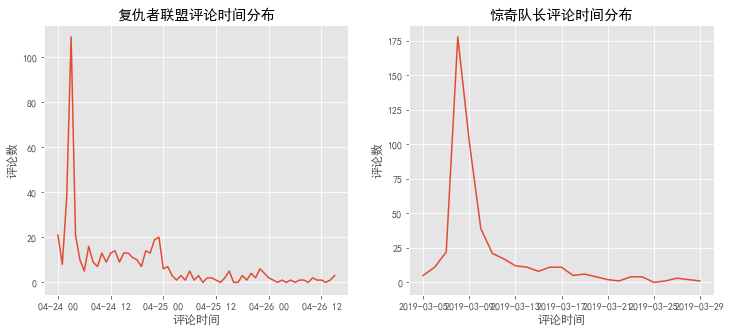

In [5]:
fig = plt.figure(figsize=(12,2))
fig.subplots_adjust(top=2)
ax1 = fig.add_subplot(121)
ax1.plot(time_sample1['movie_name'])
ax1.set_title('Â§ç‰ªáËÄÖËÅîÁõüËØÑËÆ∫Êó∂Èó¥ÂàÜÂ∏É')
ax1.set_xlabel('ËØÑËÆ∫Êó∂Èó¥')
ax1.set_ylabel('ËØÑËÆ∫Êï∞')
ax2 = fig.add_subplot(122)
ax2.plot(time_sample2['movie_name'])
ax2.set_title('ÊÉäÂ•áÈòüÈïøËØÑËÆ∫Êó∂Èó¥ÂàÜÂ∏É')
ax2.set_xlabel('ËØÑËÆ∫Êó∂Èó¥')
ax2.set_ylabel('ËØÑËÆ∫Êï∞')
# plt.savefig("ËØÑËÆ∫Êó∂Èó¥ÂàÜÂ∏ÉÂõæ.png",bbox_inches='tight', dpi=400)

In [6]:
sql = '''select location, count(*)
from user_information
where length(location) > 0
GROUP BY location
order by count(*) desc
limit 10'''
location = pd.read_sql(sql, connection)

In [7]:
location

location  count(*)
0       Âåó‰∫¨       234
1       ‰∏äÊµ∑       108
2     Âπø‰∏úÂπøÂ∑û        38
3     ÊπñÂåóÊ≠¶Ê±â        27
4     ÊµôÊ±üÊù≠Â∑û        27
5     Ê±üËãèÂçó‰∫¨        23
6     Âπø‰∏úÊ∑±Âú≥        18
7     ÈôïË•øË•øÂÆâ        15
8     ÂõõÂ∑ùÊàêÈÉΩ        15
9       ÈáçÂ∫Ü        14

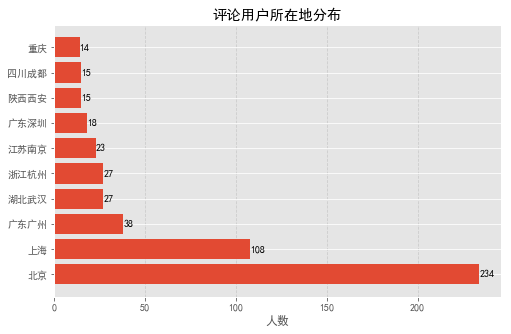

In [8]:
fig, ax1 = plt.subplots(figsize=(8,5))
x = location.loc[ : ,'location']
y = location.loc[ : ,'count(*)']
rects = ax1.barh(x, y)
# ax1.set_yticks(np.arange(len(x)))
ax1.set_yticklabels(x)
ax1.set_xlabel('‰∫∫Êï∞')
ax1.set_title('ËØÑËÆ∫Áî®Êà∑ÊâÄÂú®Âú∞ÂàÜÂ∏É', weight='bold')
ax1.grid(True, linestyle='--', which='major', axis= 'x',
                   color='grey', alpha=.25)
##ÈöêËóèËæπÊ°Ü
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
for rect in rects:
    width = rect.get_width()
    height = rect.get_y() + rect.get_height()/2
    ax1.text(width, height, int(width), ha='left', va='center', color='black', weight='bold',
                clip_on=True)
#  ‰øùÂ≠òÂõæÁâá
# plt.savefig('Áî®Êà∑ÊâÄÂú®Âú∞ÂàÜÂ∏É.png', bbox_inches='tight', dpi=400)

In [9]:
comments_data = pd.read_sql('select * from movie_comments', connection)

In [10]:
comments_data.head()

movie_name      user_name watched rating         rating_time  \
0      Â§ç‰ªáËÄÖËÅîÁõü            Ôºö-Ôºâ      ÁúãËøá     ÂäõËçê 2019-04-24 19:02:33   
1      Â§ç‰ªáËÄÖËÅîÁõü             .M      ÁúãËøá     ËøòË°å 2019-04-24 17:35:16   
2      Â§ç‰ªáËÄÖËÅîÁõü              „ÄÇ      ÁúãËøá     ÂäõËçê 2019-04-24 00:00:03   
3       ÊÉäÂ•áÈòüÈïø  "eMily"‚îÜrehab      ÁúãËøá     Êé®Ëçê 2019-03-09 22:44:25   
4      Â§ç‰ªáËÄÖËÅîÁõü           {Ëé´ÁÉ≠}      ÁúãËøá     ÂäõËçê 2019-04-25 08:49:58   

                                             comment  votes  \
0  Â¶áËÅîÂú®‰∏≠ÂõΩÊ≠ªÁöÑÊúÄÊôöÔºåÂ§çÊ¥ªÁöÑÊúÄÂø´ÔºÅpsÔºö‰ªäÂ§©ÂàöÈ°∂ÁùÄË¢´ËæûÈÄÄÁöÑÈ£éÈô©ÁúãÂÆåÂ¶áËÅî4ÂÄº‰∫ÜÔºÅüíØÔºÅÊúüÂæÖ‰∏ã‰∏Ä‰∏™10Âπ¥ÔºÅ     31   
1  Ëã±ÈõÑÈõÜÁªìÈÇ£‰∏ÄÊÆµËøòÊòØÊúâÂ∞èÂ∞èÊÑüÂä®ÂíåÁÉ≠Ë°ÄÔºåÂíåÂâçÂá†ÈÉ®‰∏ÄÊ†∑ÔºåÊï¥‰∏™ÊïÖ‰∫ãÂü∫Êú¨Ê≤°ÊúâËÆ©‰∫∫ÊÉäÂñúÁöÑÂú∞ÊñπÔºåÂ•óË∑ØÂåñÁöÑÂâß...      7   
2            ÁåÆÁªôÊàë‰∫∫Áîü‰∏≠ÊúÄÁæéÂ•ΩÁöÑÂçÅ‰∏ÄÂπ¥„ÄÇË∞¢Ë∞¢‰Ω†ÔºåÊº´Â®ÅÔºåË∞¢Ë∞¢‰Ω†ËÆ©ÊàëÁöÑÈùíÊò•Êúâ‰∫Ü‰∏Ä‰∏™ÊúÄÂÆåÁæéÁöÑÁªìÂ±Ä   8181   
3  MarvelÊâ£È¢òÂ§ß‰ΩúÔºÅÊúÄÈÄÜÂ§©‰∫∫ËÆæËã±ÈõÑÁôªÂú∫ÔºÅÂùêÁ≠âÂçïÊåëÂìçÊåáÁÅ≠Èú∏üëèËøôÊòØ‰∏™ÂÖ∂Ë≤å‰∏çÊâ¨ËÉ∏ÈÉ®Âπ≥Âπ≥Â±ÅËÇ°ÊâÅÊâÅÁöÑ...      0   
4  MCU22„ÄÇÂØπ‰∫éÊâÄÊúâÂú®Êª°Â∫ßÂâßÂú∫ËßÇÂΩ±ÁöÑËßÇ‰ºóÊù•ËØ¥ÔºåÈÉΩÊòØÈöæÂæóÁöÑÂ∑ÖÂ≥∞‰ΩìÈ™åÔºåÁúãÁùÄËßíËâ≤‰ª¨Ê≠ªÊ≠ªÁîüÁîüÔºå‰ªéÁ©øË∂ä...      1   

                                   user_url  
0  https://www.douban.com/people/151725552/  
1   https://www.douban.com/people/grayfish/  
2  https://www.douban.com/people/186208874/  
3   https://www.douban.com/people/emilycou/  
4     https://www.douban.com/people/xztiya/

In [11]:
comments_data['rating_num'] = np.nan
comments_data.loc[comments_data['rating'] == 'ÂäõËçê', 'rating_num'] = 5
comments_data.loc[comments_data['rating'] == 'Êé®Ëçê', 'rating_num'] = 4
comments_data.loc[comments_data['rating'] == 'ËøòË°å', 'rating_num'] = 3
comments_data.loc[comments_data['rating'] == 'ËæÉÂ∑Æ', 'rating_num'] = 2
comments_data.loc[comments_data['rating'] == 'ÂæàÂ∑Æ', 'rating_num'] = 1
comments_data.head()

movie_name      user_name watched rating         rating_time  \
0      Â§ç‰ªáËÄÖËÅîÁõü            Ôºö-Ôºâ      ÁúãËøá     ÂäõËçê 2019-04-24 19:02:33   
1      Â§ç‰ªáËÄÖËÅîÁõü             .M      ÁúãËøá     ËøòË°å 2019-04-24 17:35:16   
2      Â§ç‰ªáËÄÖËÅîÁõü              „ÄÇ      ÁúãËøá     ÂäõËçê 2019-04-24 00:00:03   
3       ÊÉäÂ•áÈòüÈïø  "eMily"‚îÜrehab      ÁúãËøá     Êé®Ëçê 2019-03-09 22:44:25   
4      Â§ç‰ªáËÄÖËÅîÁõü           {Ëé´ÁÉ≠}      ÁúãËøá     ÂäõËçê 2019-04-25 08:49:58   

                                             comment  votes  \
0  Â¶áËÅîÂú®‰∏≠ÂõΩÊ≠ªÁöÑÊúÄÊôöÔºåÂ§çÊ¥ªÁöÑÊúÄÂø´ÔºÅpsÔºö‰ªäÂ§©ÂàöÈ°∂ÁùÄË¢´ËæûÈÄÄÁöÑÈ£éÈô©ÁúãÂÆåÂ¶áËÅî4ÂÄº‰∫ÜÔºÅüíØÔºÅÊúüÂæÖ‰∏ã‰∏Ä‰∏™10Âπ¥ÔºÅ     31   
1  Ëã±ÈõÑÈõÜÁªìÈÇ£‰∏ÄÊÆµËøòÊòØÊúâÂ∞èÂ∞èÊÑüÂä®ÂíåÁÉ≠Ë°ÄÔºåÂíåÂâçÂá†ÈÉ®‰∏ÄÊ†∑ÔºåÊï¥‰∏™ÊïÖ‰∫ãÂü∫Êú¨Ê≤°ÊúâËÆ©‰∫∫ÊÉäÂñúÁöÑÂú∞ÊñπÔºåÂ•óË∑ØÂåñÁöÑÂâß...      7   
2            ÁåÆÁªôÊàë‰∫∫Áîü‰∏≠ÊúÄÁæéÂ•ΩÁöÑÂçÅ‰∏ÄÂπ¥„ÄÇË∞¢Ë∞¢‰Ω†ÔºåÊº´Â®ÅÔºåË∞¢Ë∞¢‰Ω†ËÆ©ÊàëÁöÑÈùíÊò•Êúâ‰∫Ü‰∏Ä‰∏™ÊúÄÂÆåÁæéÁöÑÁªìÂ±Ä   8181   
3  MarvelÊâ£È¢òÂ§ß‰ΩúÔºÅÊúÄÈÄÜÂ§©‰∫∫ËÆæËã±ÈõÑÁôªÂú∫ÔºÅÂùêÁ≠âÂçïÊåëÂìçÊåáÁÅ≠Èú∏üëèËøôÊòØ‰∏™ÂÖ∂Ë≤å‰∏çÊâ¨ËÉ∏ÈÉ®Âπ≥Âπ≥Â±ÅËÇ°ÊâÅÊâÅÁöÑ...      0   
4  MCU22„ÄÇÂØπ‰∫éÊâÄÊúâÂú®Êª°Â∫ßÂâßÂú∫ËßÇÂΩ±ÁöÑËßÇ‰ºóÊù•ËØ¥ÔºåÈÉΩÊòØÈöæÂæóÁöÑÂ∑ÖÂ≥∞‰ΩìÈ™åÔºåÁúãÁùÄËßíËâ≤‰ª¨Ê≠ªÊ≠ªÁîüÁîüÔºå‰ªéÁ©øË∂ä...      1   

                                   user_url  rating_num  
0  https://www.douban.com/people/151725552/         5.0  
1   https://www.douban.com/people/grayfish/         3.0  
2  https://www.douban.com/people/186208874/         5.0  
3   https://www.douban.com/people/emilycou/         4.0  
4     https://www.douban.com/people/xztiya/         5.0

In [12]:
avengers_data = comments_data.loc[comments_data['movie_name'] == 'Â§ç‰ªáËÄÖËÅîÁõü']
captain_data = comments_data.loc[comments_data['movie_name'] == 'ÊÉäÂ•áÈòüÈïø']

In [13]:
# Êª§Âá∫Êú™ËØÑÂàÜÁöÑÊï∞ÊçÆ
rating_num_data= comments_data.loc[comments_data['rating_num'].notnull()]
# ËÆ°ÁÆó‰∏§ÈÉ®ÁîµÂΩ±ÁöÑÂπ≥ÂùáËØÑÂàÜ
rating_num = rating_num_data.groupby('movie_name')['rating_num'].mean()
rating_num

movie_name
Â§ç‰ªáËÄÖËÅîÁõü    3.965164
ÊÉäÂ•áÈòüÈïø     3.151452
Name: rating_num, dtype: float64

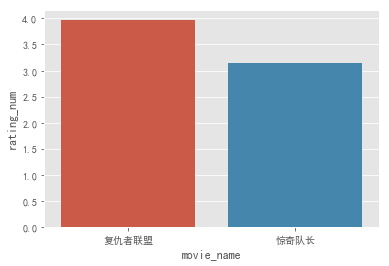

In [14]:
fig, ax = plt.subplots()
sns.barplot(rating_num.index, rating_num)
# plt.savefig('Âπ≥ÂùáÂàÜÂØπÊØî.png', dpi=400)

In [15]:
votes_data1 = comments_data.groupby(['movie_name', 'rating'])['votes'].sum()
votes_data1.rename(index={'': 'Êú™ËØÑ‰ª∑'}, inplace=True)
# votes_data1
votes_data = votes_data1.reindex(['ÂäõËçê', 'Êé®Ëçê', 'ËøòË°å', 'ËæÉÂ∑Æ', 'ÂæàÂ∑Æ', 'Êú™ËØÑ‰ª∑'], level=1)
votes_data

movie_name  rating
Â§ç‰ªáËÄÖËÅîÁõü       ÂäõËçê        83970
            Êé®Ëçê        18629
            ËøòË°å         8181
            ËæÉÂ∑Æ         4361
            ÂæàÂ∑Æ         3889
            Êú™ËØÑ‰ª∑         141
ÊÉäÂ•áÈòüÈïø        ÂäõËçê         7605
            Êé®Ëçê         8412
            ËøòË°å        15883
            ËæÉÂ∑Æ        10711
            ÂæàÂ∑Æ         2373
            Êú™ËØÑ‰ª∑          51
Name: votes, dtype: int64

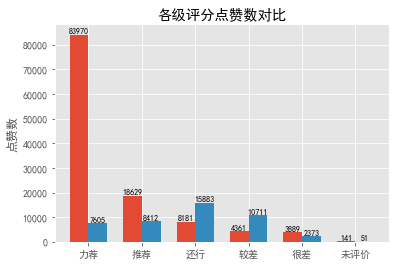

In [16]:
fig, ax = plt.subplots()
width = 0.35
x = votes_data.loc['Â§ç‰ªáËÄÖËÅîÁõü'].index
y = votes_data.loc['Â§ç‰ªáËÄÖËÅîÁõü']
y2 = votes_data.loc['ÊÉäÂ•áÈòüÈïø']
index = np.arange(len(x))
rect1 = ax.bar(index, y, width, align='center', label='Â§ç‰ªáËÄÖËÅîÁõü')
rect2 = ax.bar(index + width, y2, width, align='center', label='ÊÉäÂ•áÈòüÈïø')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(x)
ax.set_title('ÂêÑÁ∫ßËØÑÂàÜÁÇπËµûÊï∞ÂØπÊØî')
ax.set_ylabel('ÁÇπËµûÊï∞')
for rect in rect1:
    xloc = rect.get_x() + rect.get_width() / 2
    yloc = int(rect.get_height())
    ax.text(xloc, yloc,yloc, ha='center', va='bottom', color='black', fontsize=8)
for rect in rect2:
    xloc = rect.get_x() + rect.get_width() / 2
    yloc = int(rect.get_height())
    ax.text(xloc, yloc,yloc, ha='center', va='bottom', color='black', fontsize=8)
# plt.savefig('ÂêÑÁ∫ßËØÑÂàÜÁÇπËµûÊï∞ÂØπÊØî.png', bbox_inches='tight', dpi=400)

In [17]:
avengers_data.groupby('rating')['movie_name'].count()

rating
       11
ÂäõËçê    232
ÂæàÂ∑Æ     30
Êé®Ëçê    101
ËæÉÂ∑Æ     34
ËøòË°å     91
Name: movie_name, dtype: int64

In [18]:
all_rating = comments_data.groupby(['movie_name', 'rating'])['user_name'].count()
all_rating
# all_rating2 = all_rating.reindex['ÂäõËçê', 'Êé®Ëçê', 'ËøòË°å', 'ËæÉÂ∑Æ', 'ÂæàÂ∑Æ', '']

movie_name  rating
Â§ç‰ªáËÄÖËÅîÁõü                  11
            ÂäõËçê        232
            ÂæàÂ∑Æ         30
            Êé®Ëçê        101
            ËæÉÂ∑Æ         34
            ËøòË°å         91
ÊÉäÂ•áÈòüÈïø                   17
            ÂäõËçê         38
            ÂæàÂ∑Æ         21
            Êé®Ëçê        127
            ËæÉÂ∑Æ         88
            ËøòË°å        208
Name: user_name, dtype: int64

In [19]:
avengers_rating = all_rating.loc['Â§ç‰ªáËÄÖËÅîÁõü'].reindex(['ÂäõËçê', 'Êé®Ëçê', 'ËøòË°å', 'ËæÉÂ∑Æ', 'ÂæàÂ∑Æ', ''])
avengers_rating
captain_rating = all_rating.loc['ÊÉäÂ•áÈòüÈïø'].reindex(['ÂäõËçê', 'Êé®Ëçê', 'ËøòË°å', 'ËæÉÂ∑Æ', 'ÂæàÂ∑Æ', ''])

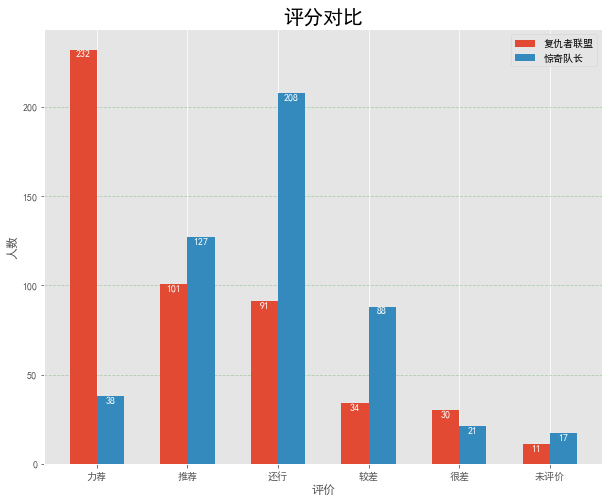

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = ['SimHei'] # Ê≠•È™§‰∏ÄÔºàÊõøÊç¢sans-serifÂ≠ó‰ΩìÔºâ
plt.rcParams['axes.unicode_minus'] = False   # Ê≠•È™§‰∫åÔºàËß£ÂÜ≥ÂùêÊ†áËΩ¥Ë¥üÊï∞ÁöÑË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢òÔºâ
x = avengers_rating.index
y = avengers_rating
x2 = captain_rating.index
y2 = captain_rating
index = np.arange(len(x))
bar_width=0.3
rect1 = ax.bar(index, y, bar_width, align='center', label='Â§ç‰ªáËÄÖËÅîÁõü')
rect2 = ax.bar(index+bar_width, y2, bar_width, align='center', label='ÊÉäÂ•áÈòüÈïø')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['ÂäõËçê', 'Êé®Ëçê', 'ËøòË°å', 'ËæÉÂ∑Æ', 'ÂæàÂ∑Æ', 'Êú™ËØÑ‰ª∑'])
ax.set_xlabel('ËØÑ‰ª∑', fontsize=12, weight='bold')
ax.set_ylabel('‰∫∫Êï∞', fontsize=12, weight='bold')
ax.set_title('ËØÑÂàÜÂØπÊØî', fontsize=20)
for rect in rect1:
    yloc = int(rect.get_height())
    xloc = rect.get_x() + rect.get_width() / 2.0
    ax.text(xloc, yloc, yloc, ha='center', va='top', color='white')
for rect in rect2:
    yloc = int(rect.get_height())
    xloc = rect.get_x() + rect.get_width() / 2.0
    ax.text(xloc, yloc, yloc, ha='center', va='top', color='white')
ax.grid(True, linestyle='--', color='g', which='major', axis='y', alpha=0.25)    
ax.legend(loc='best')
#  plt.savefig('ËØÑÂàÜÂØπÊØîÊü±Áä∂Âõæ.png', dpi=400)

Text(0.5, 1.0, 'ÊÉäÂ•áÈòüÈïøËØÑÂàÜÂç†ÊØî')

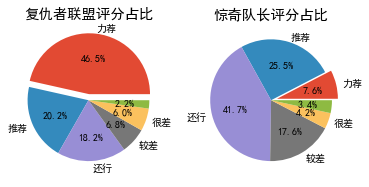

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
explode = [0.1, 0, 0, 0, 0, 0]
ax1.pie(avengers_rating, labels = list(avengers_rating.index), autopct='%1.1f%%', 
       explode=explode)
ax2.pie(captain_rating, labels = list(captain_rating.index), autopct='%1.1f%%',
       explode=explode)
ax1.set_title('Â§ç‰ªáËÄÖËÅîÁõüËØÑÂàÜÂç†ÊØî')
ax2.set_title('ÊÉäÂ•áÈòüÈïøËØÑÂàÜÂç†ÊØî')
# plt.savefig('Â§çËÅî‰∏éÊÉäÂ•áÈòüÈïøËØÑÂàÜÂØπÊØîÈ•ºÁä∂Âõæ.png', dpi=400)

In [22]:
sql = 'select * from user_information'
user_information = pd.read_sql(sql, connection)

In [23]:
user_information.head()

user_name   location   sign_time  watching_num  wish_num  collect_num  \
0            Ôºö-Ôºâ       ÊπñÂåóÈªÑÁü≥  2016-09-28           NaN       1.0          181   
1             .M       Âπø‰∏úÊ∑±Âú≥  2010-06-18           4.0     158.0         1181   
2              „ÄÇ             2018-10-21           NaN       NaN            8   
3  "eMily"‚îÜrehab       Âπø‰∏úÂπøÂ∑û  2007-09-22          75.0    1245.0         1264   
4           {Ëé´ÁÉ≠}  Singapore  2008-03-07          10.0     156.0         1064   

  movie_name  
0      Â§ç‰ªáËÄÖËÅîÁõü  
1      Â§ç‰ªáËÄÖËÅîÁõü  
2      Â§ç‰ªáËÄÖËÅîÁõü  
3       ÊÉäÂ•áÈòüÈïø  
4      Â§ç‰ªáËÄÖËÅîÁõü

In [24]:
#ÊääÁº∫Â§±ÂÄºÊõøÊç¢‰∏∫0
user_information.fillna(0, inplace=True)
user_information.head()

user_name   location   sign_time  watching_num  wish_num  collect_num  \
0            Ôºö-Ôºâ       ÊπñÂåóÈªÑÁü≥  2016-09-28           0.0       1.0          181   
1             .M       Âπø‰∏úÊ∑±Âú≥  2010-06-18           4.0     158.0         1181   
2              „ÄÇ             2018-10-21           0.0       0.0            8   
3  "eMily"‚îÜrehab       Âπø‰∏úÂπøÂ∑û  2007-09-22          75.0    1245.0         1264   
4           {Ëé´ÁÉ≠}  Singapore  2008-03-07          10.0     156.0         1064   

  movie_name  
0      Â§ç‰ªáËÄÖËÅîÁõü  
1      Â§ç‰ªáËÄÖËÅîÁõü  
2      Â§ç‰ªáËÄÖËÅîÁõü  
3       ÊÉäÂ•áÈòüÈïø  
4      Â§ç‰ªáËÄÖËÅîÁõü

In [25]:
from datetime import datetime
user_information['Year of registration'] =np.nan
user_information['sign_time']=pd.to_datetime(user_information['sign_time'])
# user_information.dtypes
user_information['Year of registration'] = (datetime.now() - user_information['sign_time'])
user_information.head()

user_name   location  sign_time  watching_num  wish_num  collect_num  \
0            Ôºö-Ôºâ       ÊπñÂåóÈªÑÁü≥ 2016-09-28           0.0       1.0          181   
1             .M       Âπø‰∏úÊ∑±Âú≥ 2010-06-18           4.0     158.0         1181   
2              „ÄÇ            2018-10-21           0.0       0.0            8   
3  "eMily"‚îÜrehab       Âπø‰∏úÂπøÂ∑û 2007-09-22          75.0    1245.0         1264   
4           {Ëé´ÁÉ≠}  Singapore 2008-03-07          10.0     156.0         1064   

  movie_name      Year of registration  
0      Â§ç‰ªáËÄÖËÅîÁõü  946 days 18:06:59.778612  
1      Â§ç‰ªáËÄÖËÅîÁõü 3240 days 18:06:59.778612  
2      Â§ç‰ªáËÄÖËÅîÁõü  193 days 18:06:59.778612  
3       ÊÉäÂ•áÈòüÈïø 4240 days 18:06:59.778612  
4      Â§ç‰ªáËÄÖËÅîÁõü 4073 days 18:06:59.778612

In [26]:
user_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
user_name               998 non-null object
location                998 non-null object
sign_time               998 non-null datetime64[ns]
watching_num            998 non-null float64
wish_num                998 non-null float64
collect_num             998 non-null int64
movie_name              998 non-null object
Year of registration    998 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), timedelta64[ns](1)
memory usage: 62.5+ KB


In [27]:
user_information.describe()

watching_num      wish_num   collect_num       Year of registration
count    998.000000    998.000000    998.000000                        998
mean      12.331663    594.654309   1948.280561  2958 days 11:07:06.993040
std       25.983314   1452.577464   1970.620641  1288 days 12:06:57.355944
min        0.000000      0.000000      1.000000     9 days 18:06:59.778612
25%        0.000000     32.000000    626.500000  2107 days 06:06:59.778612
50%        3.000000    217.000000   1476.500000  3160 days 06:06:59.778612
75%       13.000000    606.500000   2571.250000  3980 days 12:06:59.778611
max      227.000000  31264.000000  20311.000000  5046 days 18:06:59.778612